In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

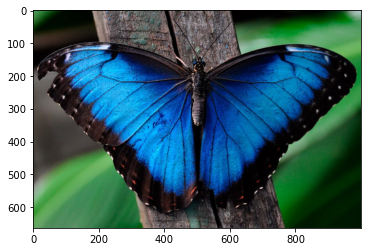

(664, 1000, 3)

In [10]:
img = cv2.imread('datasets/mariposa.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RBG) #convertir color [viene en cv]
img = cv2.cvtColor(img, code = cv2.COLOR_BGR2RGB) #convertir color [viene en cv]
plt.figure()
plt.imshow(img)
plt.show()
img.shape

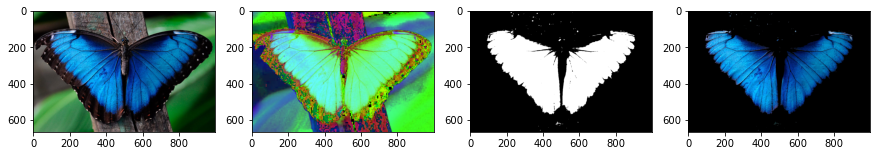

In [14]:
nrows, ncols, nch = img.shape
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) #Hue [0, 180], Saturacion [0, 255], Valor [0, 255]
    
#                 hue sat val
lower = np.array([90, 50, 50])
upper = np.array([130, 255, 255])
maskRange = cv2.inRange(hsv, lower, upper)
imgMask = cv2.bitwise_and(img, img, mask = maskRange)

plt.figure(figsize = (15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(hsv)
plt.subplot(1, 4, 3)
plt.imshow(maskRange, cmap = 'gray') #Paints white the ones that fall in the mask, gray to paint it in gray scale
plt.subplot(1, 4, 4)
plt.imshow(imgMask)
plt.show()

img (664, 1000, 3)
gray (664, 1000)
imgGray (664, 1000, 3)


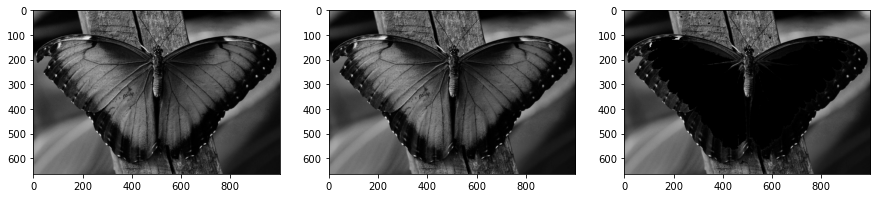

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imgGray = np.zeros_like(img)
imgGray[:, :, 0] = gray
imgGray[:, :, 1] = gray
imgGray[:, :, 2] = gray
print('img', img.shape)
print('gray', gray.shape) #Has only one color channel
print('imgGray', imgGray.shape)

grayMask = cv2.bitwise_and(imgGray, imgGray, mask = ~maskRange)

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap = 'gray')
#plt.imshow(gray, cmap = 'jet')
plt.subplot(1, 3, 2)
plt.imshow(imgGray)
plt.subplot(1, 3, 3)
plt.imshow(grayMask)
plt.show()

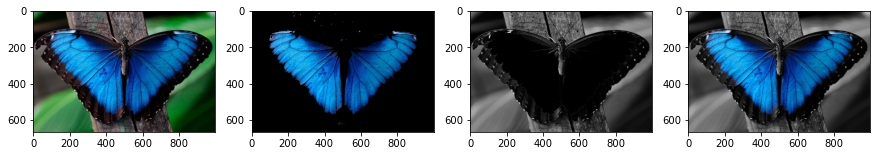

In [29]:
imgFinal = imgMask + grayMask
plt.figure(figsize = (15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(imgMask)
plt.subplot(1, 4, 3)
plt.imshow(grayMask)
plt.subplot(1, 4, 4)
plt.imshow(imgFinal)
plt.show()

### Vectorizar una imagen
Convertir cada canal (matriz) a un solo vector y pegarlos como columna

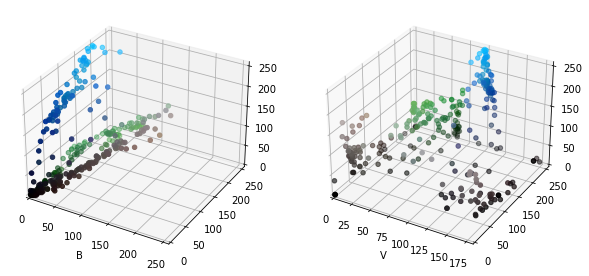

In [75]:
img = cv2.imread('datasets/mariposa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
nrows, ncols, nch = img.shape
xImg = np.reshape(img, (nrows*ncols, 3))
xHsv = np.reshape(hsv, (nrows*ncols, 3))

nSample = 300
idx = np.random.permutation(nrows*ncols)[: nSample]
xImg = xImg[idx, :]
xHsv = xHsv[idx, :]

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(1, 2, 1, projection = '3d')
ax.scatter(xImg[:, 0], xImg[:, 1], xImg[:, 2], c = xImg/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_xlabel('G')
ax.set_xlabel('B')

ax = plt.subplot(1, 2, 2, projection = '3d')
ax.scatter(xHsv[:, 0], xHsv[:, 1], xHsv[:, 2], c = xImg/255)
ax.set_xlim(0, 180)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('H')
ax.set_xlabel('S')
ax.set_xlabel('V')
plt.show()

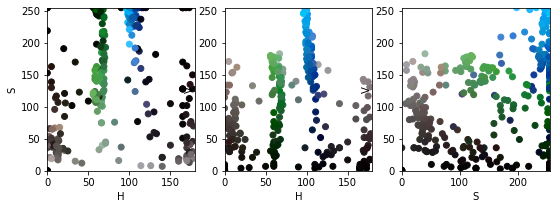

In [81]:
plt.figure(figsize = (9, 3))
plt.subplot(1, 3, 1)
plt.scatter(xHsv[:, 0], xHsv[:, 1], c = xImg/255)
plt.xlim(0, 180)
plt.ylim(0, 255)
plt.xlabel('H')
plt.ylabel('S')

plt.subplot(1, 3, 2)
plt.scatter(xHsv[:, 0], xHsv[:, 2], c = xImg/255)
plt.xlim(0, 180)
plt.ylim(0, 255)
plt.xlabel('H')
plt.ylabel('V')

plt.subplot(1, 3, 3)
plt.scatter(xHsv[:, 1], xHsv[:, 2], c = xImg/255)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.xlabel('S')
plt.ylabel('V')
plt.show()

(array([55, 11,  3, 91,  2, 63, 26,  8,  4, 37], dtype=int64), array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]))


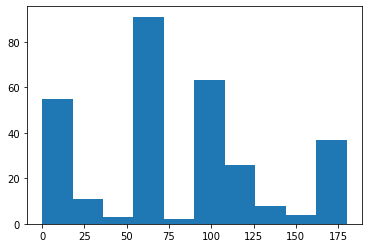

In [84]:
h = np.histogram(xHsv[:, 0], bins = 10, range = [0, 180]) #returns frequency and ranges
print(h)
plt.figure()
plt.hist(xHsv[:, 0], bins = 10, range = [0, 180])
plt.show()